<a href="https://colab.research.google.com/github/pqminh27/MachineLearning/blob/main/test_laptopPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
def Encode (df):
    for column in df.columns:
        if df[column].dtype != 'int64' and df[column].dtype != 'float64':
            enc = LabelEncoder()
            enc.fit(df[column])
            df[column] = enc.transform(df[column])
    return df


In [3]:
def lin_reg(x_train, x_test, y_train, y_test):
    reg = LinearRegression()
    print ('_________Linear_____')
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    print (reg.intercept_, reg.coef_)
    print ('R2 = ', r2_score(y_test, y_pred))
    print ('MAPE = ', mean_absolute_percentage_error(y_test, y_pred))
    return y_pred


In [4]:
def near_neigh (x_train, x_test, y_train, y_test, n):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(x_train, y_train)
    print ('_________Neighbour_____')
    y_pred = reg.predict(x_test)
    print ('R2 = ', r2_score(y_test, y_pred))
    print ('MAPE = ',mean_absolute_percentage_error(y_test, y_pred))
    return y_pred


In [5]:
def dec_tree(x_train, x_test, y_train, y_test, n):
    reg = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=7, max_depth = n) # минимальное разбиение
    reg.fit(x_train, y_train)
    print ('_________dec_tree_____')
    y_pred = reg.predict(x_test)
    print ('R2 = ', r2_score(y_test, y_pred))
    print ('MAPE = ',mean_absolute_percentage_error(y_test, y_pred))
    return y_pred


In [6]:
def rand_f (x_train, x_test, y_train, y_test):
    reg = RandomForestRegressor()
    reg.fit(x_train, y_train)
    print ('_________reg_for_____')
    y_pred = reg.predict(x_test)
    print ('R2 = ', r2_score(y_test, y_pred))
    print ('MAPE = ',mean_absolute_percentage_error(y_test, y_pred))
    return y_pred


In [7]:
df = pd.read_csv('laptop_price.csv', encoding= 'cp1251')
print (df.info()) # без пропусков
df.drop('laptop_ID', inplace = True, axis = 1)
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None
            Inches  Price_euros
count  1303.000000  1303.000000
mean     15.017191  1123.686992
std       1.426304   6

In [8]:
df = df.drop_duplicates ()
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   object 
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   object 
 11  Price_euros       1275 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.5+ KB
None


In [9]:
print (df['ScreenResolution'].unique())
df['resolution'] = df['ScreenResolution'].str.extract(pat = '(\d+x\d+)')
df['touchscreen'] = df['ScreenResolution'].str.extract(pat = '(Touchscreen)')
df['touchscreen'] = df['touchscreen'].replace('Touchscreen',1)
df['touchscreen'] = df['touchscreen'].replace(np.nan,0)
df.drop('ScreenResolution', inplace = True, axis = 1)
df['touchscreen'] = df['touchscreen'].astype(int)

['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchscreen 1366x768' '1920x1080'
 'IPS Panel Full HD 1920x1200'
 'IP

In [10]:
print (df.Cpu.unique())
df['Cpu'] = df['Cpu'].str.split()
print (df['Cpu'])
df['Cpu1'] = [i[-1] for i in df['Cpu']]
df['cpu_frequency_GHz'] = df['Cpu1'].apply(lambda i: str(i[:-3]))
df['cpu_frequency_GHz'] = df['cpu_frequency_GHz'].astype(float)
df['Cpu_brand'] = [i[0] for i in df['Cpu']]
df.drop(['Cpu', 'Cpu1'], inplace = True, axis = 1)
print (df['Cpu_brand'].unique())

['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Atom x5-Z8350 1.44GHz' 'Intel Core i5 7300HQ 2.5GHz'
 'AMD E-Series E2-9000e 1.5GHz' 'Intel Core i5 1.6GHz'
 'Intel Core i7 8650U 1.9GHz' 'Intel Atom x5-Z8300 1.44GHz'
 'AMD E-Series E2-6110 1.5GHz' 'AMD A6-Series 9220 2.5GHz'
 'Intel Celeron Dual Core N3350 1.1GHz' 'Intel Core i3 7130U 2.7GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 2.0GHz'
 'AMD Ryzen 1700 3GHz' 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Atom x5-Z8550 1.44GHz' 'Intel Celeron Dual Core N3060 1.6GHz'
 'Intel Core i5 1.3GHz' 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 620

In [11]:
print (df.Ram.unique())
df['Ram_Gb'] = df['Ram'].apply(lambda i: str(i[:-2]))
df.drop('Ram', inplace = True, axis = 1)
df['Ram_Gb'] = df['Ram_Gb'].astype(int)

['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']


In [12]:
print (df.Memory.unique())
df['Memory']=df['Memory'].str.replace('1.0TB','1TB', regex=True)
df['Memory']=df['Memory'].str.replace('1TB','1000GB')
df['Memory']=df['Memory'].str.replace('2TB','2000GB')
df['Memory'] = df['Memory'].str.split()
df['Memory_GB'] = [i[0] for i in df['Memory']]
df['Memory_GB'] = df['Memory_GB'].apply(lambda i: str(i[:-2]))
df['Memory_GB'] = df['Memory_GB'].astype(int)
df['Memory_GB'] = df['Memory_GB'].astype(int)
df.drop('Memory', inplace = True, axis = 1)


['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


In [13]:
print (df.Weight.unique())
df['Weight_kg'] = df['Weight'].apply(lambda i: str(i[:-2]))
df.drop('Weight', inplace = True, axis = 1)
df['Weight_kg'] = df['Weight_kg'].astype(float)


['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '0.98kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg'
 '1.35kg' '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg'
 '2kg' '2.65kg' '2.77kg' '3.2kg' '0.69kg' '1.49kg' '2.4kg' '2.13kg'
 '2.43kg' '1.7kg' '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg'
 '1.63kg' '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg'
 '1.58kg' '1.85kg' '1.23kg' '1.26kg' '2.16kg' '2.36kg' '2.05kg' '1.32kg'
 '1.75kg' '0.97kg' '2.9kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg'
 '2.03kg' '1.05kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg'
 '1.12kg' '1.42kg' '3.49kg' '3.35kg' '2.23kg' '4.42kg' '2.69kg' '2.37kg'
 '4.7kg' '3.6kg' '2.08kg' '4.3kg' '1.68kg' '1.41kg' '4.14kg' '2.18kg'
 '2.24kg' '2.67kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '1.84kg' '2.6kg' '2.26kg'
 '3.25kg' '1.59kg' '1.13kg' '1.78kg' '1.10kg' '1.15kg' '1.27kg' '1.43kg

In [14]:
print (df.Gpu.unique())
df['Gpu_brand'] = df['Gpu'].str.split()
df['Gpu_brand'] = [i[0] for i in df['Gpu_brand']]
df.drop('Gpu', inplace = True, axis = 1)

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Intel HD Graphics 400'
 'Nvidia GeForce GTX 1050' 'AMD Radeon R2' 'AMD Radeon 530'
 'Nvidia GeForce 930MX' 'Intel HD Graphics' 'Intel HD Graphics 500'
 'Nvidia GeForce 930MX ' 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Nvidia GeForce MX130' 'AMD R4 Graphics'
 'Nvidia GeForce GTX 940MX' 'AMD Radeon RX 560' 'Nvidia GeForce 920M'
 'AMD Radeon R7 M445' 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M'
 'Intel HD Graphics 515' 'AMD Radeon R5 M420' 'Intel HD Graphic

In [15]:
cols = list(df.columns)
cols = cols[0:5] + cols[6:] + [cols[5]]
df = df [cols]

In [16]:
brands = df['Company'].unique()

print (df.info())
df = Encode(df)
# print (df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1275 non-null   object 
 1   Product            1275 non-null   object 
 2   TypeName           1275 non-null   object 
 3   Inches             1275 non-null   float64
 4   OpSys              1275 non-null   object 
 5   resolution         1275 non-null   object 
 6   touchscreen        1275 non-null   int64  
 7   cpu_frequency_GHz  1275 non-null   float64
 8   Cpu_brand          1275 non-null   object 
 9   Ram_Gb             1275 non-null   int64  
 10  Memory_GB          1275 non-null   int64  
 11  Weight_kg          1275 non-null   float64
 12  Gpu_brand          1275 non-null   object 
 13  Price_euros        1275 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 149.4+ KB
None


In [17]:
# анализ на качество данных
print (df.describe())

           Company      Product     TypeName       Inches        OpSys  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean      6.460392   307.334902     2.582745    15.022902     4.814118   
std       4.096247   171.162972     1.247925     1.429470     1.034319   
min       0.000000     0.000000     0.000000    10.100000     0.000000   
25%       4.000000   180.500000     1.000000    14.000000     5.000000   
50%       7.000000   291.000000     3.000000    15.600000     5.000000   
75%      10.000000   454.500000     3.000000    15.600000     5.000000   
max      18.000000   617.000000     5.000000    18.400000     8.000000   

        resolution  touchscreen  cpu_frequency_GHz    Cpu_brand       Ram_Gb  \
count  1275.000000  1275.000000        1275.000000  1275.000000  1275.000000   
mean      3.091765     0.147451           2.302980     0.953725     8.440784   
std       3.083641     0.354694           0.503846     0.213864     5.097809   
min       0.0

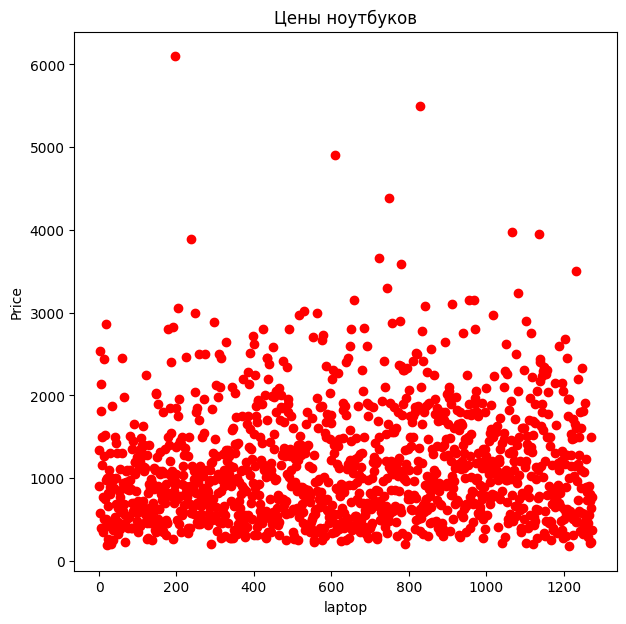

In [18]:
# цены по ноутбукам
plt.figure(figsize = (7, 7))
y_prices = np.array(df['Price_euros'])
x_id = np.array(range(len(df)))
plt.scatter(x_id, y_prices, color = 'red')
plt.title ('Цены ноутбуков')
plt.xlabel ('laptop')
plt.ylabel ('Price')
plt.savefig('Lap prices.png')
plt.show()
plt.close('all')
# видны выбросы в ценовом факторе

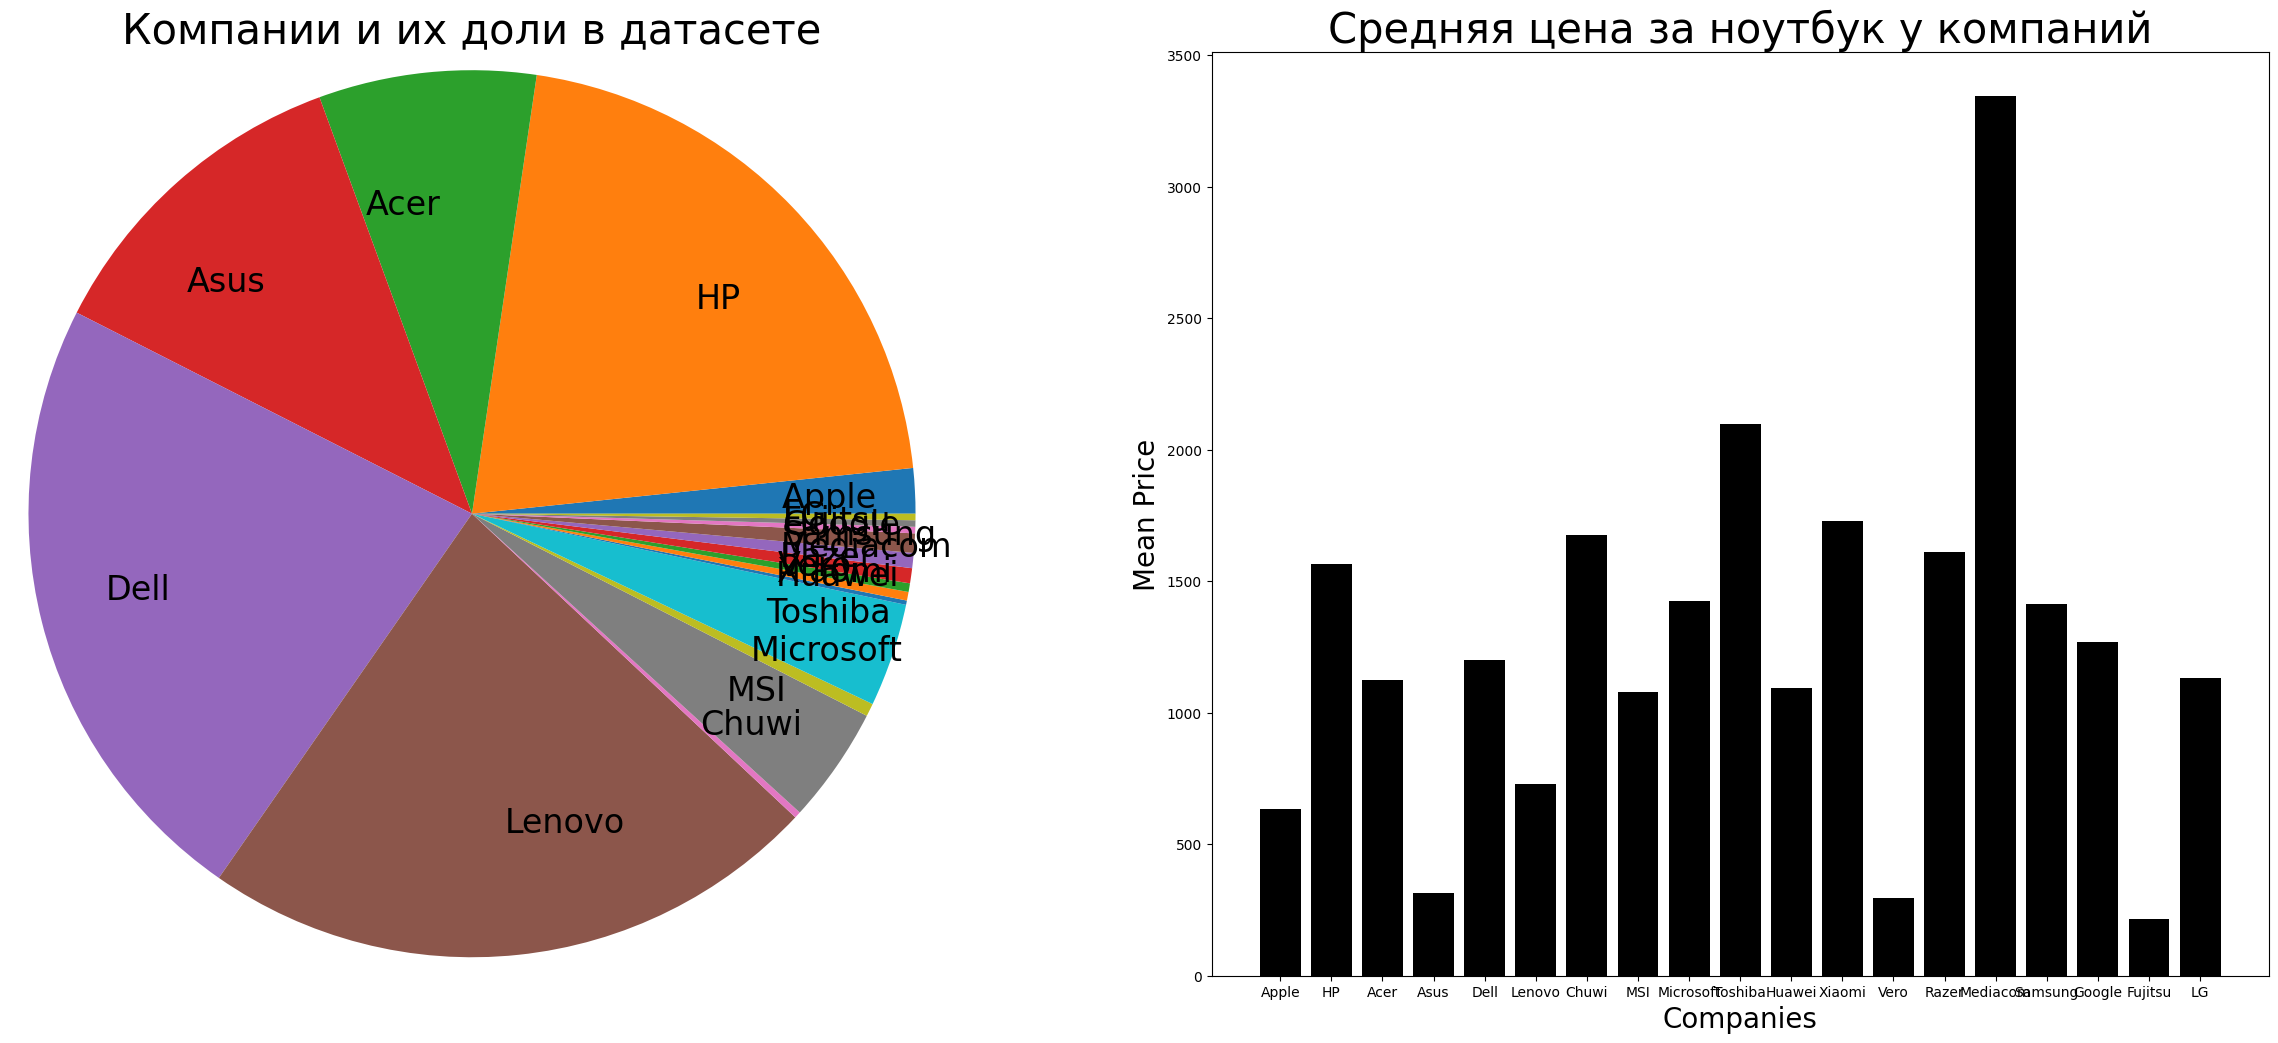

In [19]:
# сколько ноутбуков у производителя
plt.figure(figsize = (30, 12))
plt.subplot(1, 2, 1)
counts = df['Company'].value_counts(sort = False)
plt.title ('Компании и их доли в датасете', fontdict = {'fontsize' : 30})
plt.pie(counts, labels = brands, labeldistance=0.7, radius=1.2, textprops={'fontsize': 24})
# средние цены по производителям
brand_mean_price = []
for i in range(len(brands)):
    brand_mean_price.append(df[df['Company'] == i].Price_euros.mean())
plt.subplot(1,2,2)
plt.bar(brands, brand_mean_price, color = 'black')
plt.xlabel('Companies', fontdict = {'fontsize' : 20})
plt.ylabel('Mean Price', fontdict = {'fontsize' : 20})
plt.title ('Средняя цена за ноутбук у компаний', fontdict = {'fontsize' : 30})
plt.savefig('Price factors.png')
plt.show()
plt.close('all')


In [20]:
# метод 3 сигм
df = df[df['Price_euros'] < 3*df['Price_euros'].std() + df['Price_euros'].mean()]
print (df.describe())


           Company      Product     TypeName       Inches        OpSys  \
count  1263.000000  1263.000000  1263.000000  1263.000000  1263.000000   
mean      6.444181   307.477435     2.586698    15.006572     4.809184   
std       4.090480   170.774504     1.241853     1.422748     1.035432   
min       0.000000     0.000000     0.000000    10.100000     0.000000   
25%       4.000000   182.000000     2.000000    14.000000     5.000000   
50%       7.000000   291.000000     3.000000    15.600000     5.000000   
75%      10.000000   453.500000     3.000000    15.600000     5.000000   
max      18.000000   617.000000     5.000000    18.400000     8.000000   

        resolution  touchscreen  cpu_frequency_GHz    Cpu_brand       Ram_Gb  \
count  1263.000000  1263.000000        1263.000000  1263.000000  1263.000000   
mean      3.049089     0.147268           2.298021     0.953286     8.248614   
std       3.020920     0.354514           0.503502     0.214830     4.531798   
min       0.0

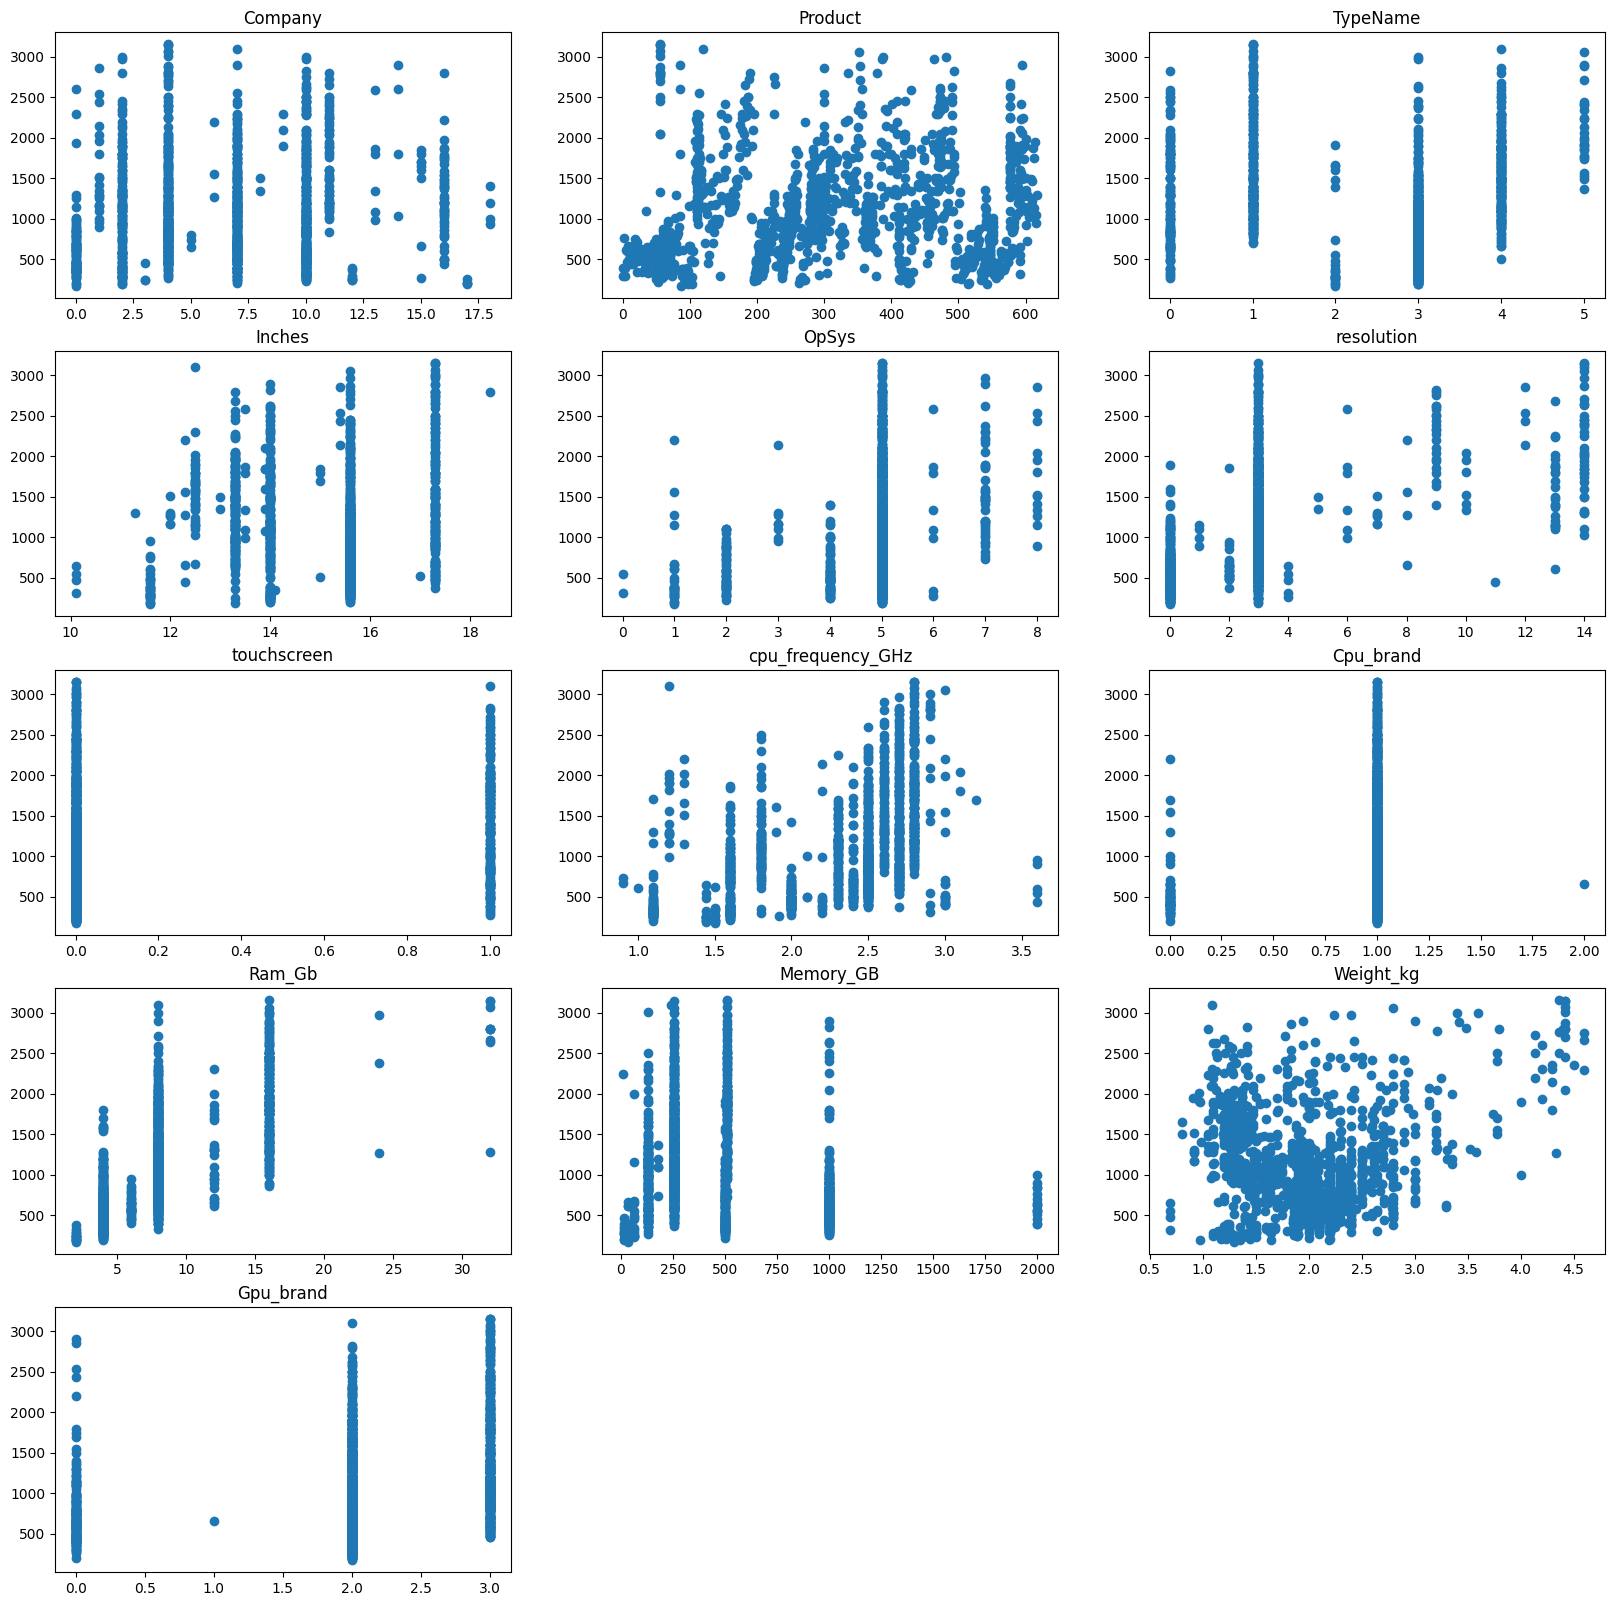

In [21]:
#  посмотрим графически степень влияния факторов
fig = plt.figure(figsize = (20, 20))
for i, item in enumerate(df.columns[0:-1], start = 1):
    graf = fig.add_subplot(5, 3, i)
    plt.scatter(df[item], df['Price_euros'])
    graf.set_title(item)
plt.savefig('Factors.png')
plt.show()
plt.close('all')

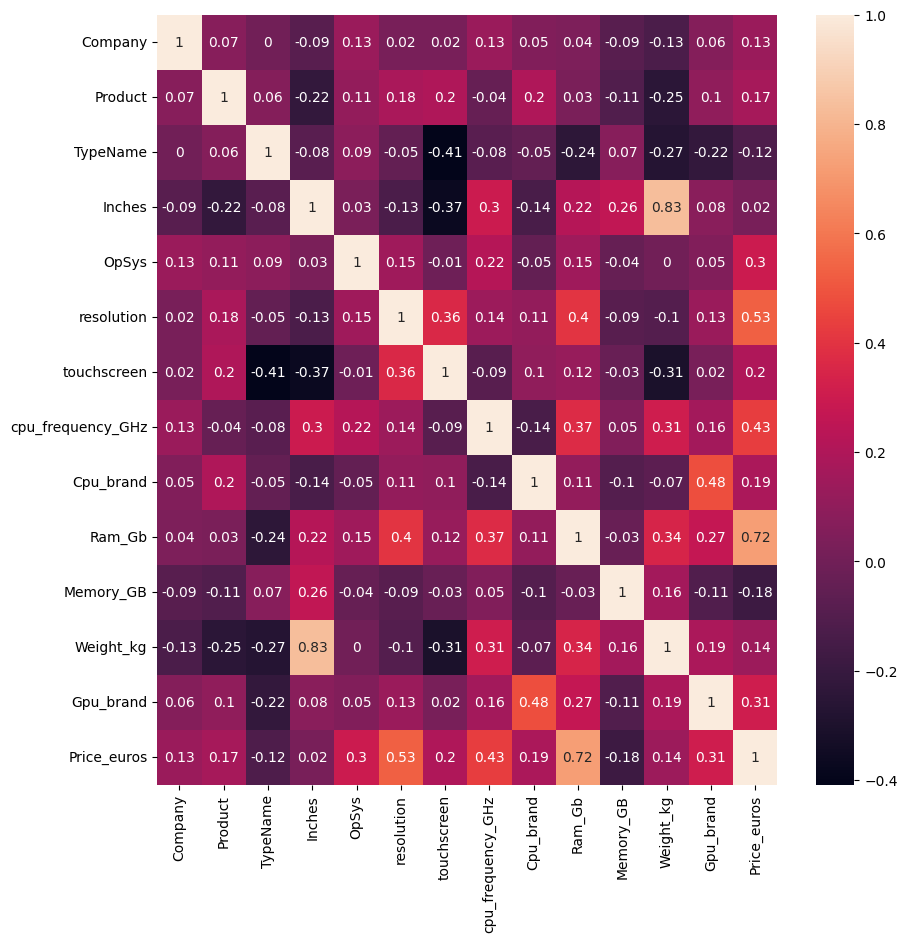

In [22]:
# корреляция
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr())
sns.heatmap(df.corr().round(2), cbar = False, annot = True)
plt.savefig('corr_matrix.png')
plt.show()
plt.close('all')
# inches weight чильно коррелируют между собой
# на price влиаяет ram  cpu resolution


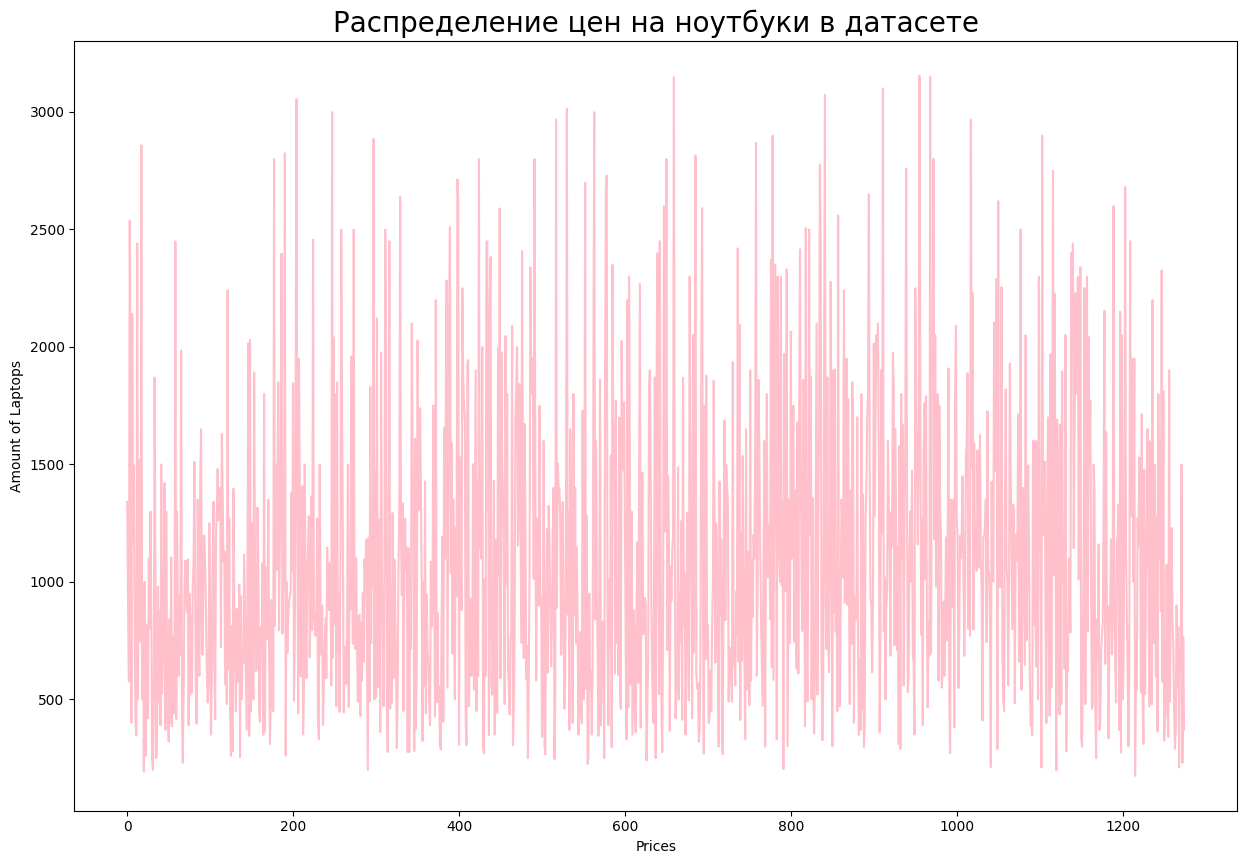

In [23]:
plt.figure(figsize = (15, 10))
plt.plot(df['Price_euros'], color = 'pink')
plt.xlabel('Prices', fontdict = {'fontsize' : 10})
plt.ylabel('Amount of Laptops', fontdict = {'fontsize' : 10})
plt.title('Распределение цен на ноутбуки в датасете', fontdict = {'fontsize' : 20})
plt.savefig('Prices1.png')
plt.show()


In [24]:
# plt.figure(figsize = (15, 10))
# plt.bar([x for x in range(10)], df['Price_euros'].values[:10], color = 'pink')
# # plt.xlim(0,3000)
# # plt.ylim(0,250)
# plt.xlabel('Prices', fontdict = {'fontsize' : 10})
# plt.ylabel('Amount of Laptops', fontdict = {'fontsize' : 10})
# plt.title('Распределение цен на ноутбуки в датасете', fontdict = {'fontsize' : 20})
# plt.savefig('Prices2.png')
# plt.show()

In [28]:
# df_factors = df[df.columns[:-1]]
df_factors = df.drop("Price_euros", axis=1)
y_factors = df['Price_euros']
x_train, x_test, y_train, y_test = train_test_split(df_factors, y_factors, train_size = 0.8, random_state = 1)

y_pred1 = lin_reg(x_train, x_test, y_train, y_test)
y_pred2 = near_neigh(x_train, x_test, y_train, y_test, 1)
y_pred3 = dec_tree(x_train, x_test, y_train, y_test,10)
y_pred4 = rand_f(x_train, x_test, y_train, y_test)


_________Linear_____
-169.38360099831493 [ 5.53761568e+00  9.47075614e-02  4.96833001e+01 -7.89200182e+01
  7.70021274e+01  4.58129527e+01  1.36043547e+02  2.76656480e+02
  2.35945169e+02  6.97636186e+01 -2.06656769e-01  1.45257400e+02
  4.42347371e+01]
R2 =  0.5936087025951609
MAPE =  0.2989943313509655
_________Neighbour_____
R2 =  0.6675855073039421
MAPE =  0.22631042611297736
_________dec_tree_____
R2 =  0.6998316316772175
MAPE =  0.22067861515327478
_________reg_for_____
R2 =  0.8131076900079646
MAPE =  0.1645926115937376
